In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
# Data directories
data_dir_train = pathlib.Path("C:/Major Project 2023 7th sem/DATA SET/Train")
data_dir_test = pathlib.Path("C:/Major Project 2023 7th sem/DATA SET/Test")

In [4]:
# Parameters
batch_size = 32
img_height = 180
img_width = 180
num_classes = 9  # Update this with the number of classes in your dataset

In [5]:
# Data preprocessing and augmentation
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2322 files belonging to 9 classes.
Using 1858 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset="validation",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2322 files belonging to 9 classes.
Using 464 files for validation.


In [8]:
# Model - LeNet-5 architecture
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(num_classes)
])


c:\Users\91939\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [10]:
# Train the model
epochs = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - accuracy: 0.1959 - loss: 2.2761 - val_accuracy: 0.2802 - val_loss: 1.9019
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.3098 - loss: 1.8736 - val_accuracy: 0.3233 - val_loss: 1.8171
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 13s 217ms/step - accuracy: 0.3755 - loss: 1.7444 - val_accuracy: 0.3513 - val_loss: 1.7468
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 13s 213ms/step - accuracy: 0.3771 - loss: 1.6831 - val_accuracy: 0.3685 - val_loss: 1.6931
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.3960 - loss: 1.6367 - val_accuracy: 0.4052 - val_loss: 1.5748
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.4327 - loss: 1.5373 - val_accuracy: 0.4591 - val_loss: 1.5823
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.5250 - loss: 1.4135 - val_accuracy: 0.4310 - val_loss: 1.5179
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.5321 - loss: 1.3431 - val_accuracy

In [11]:
# Plotting training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

Text(0, 0.5, 'Accuracy')

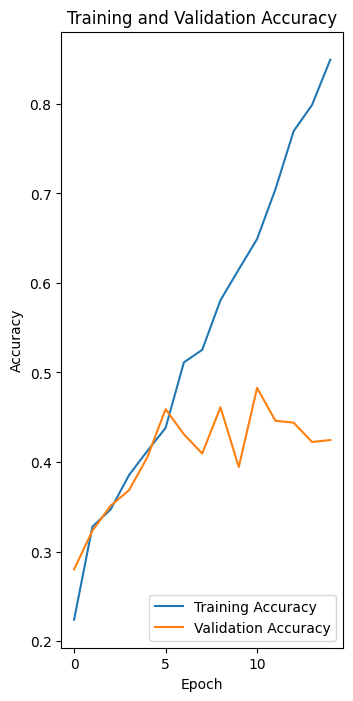

In [12]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

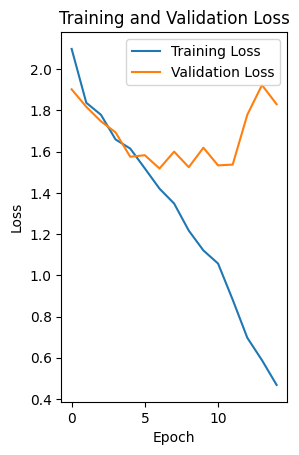

In [13]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()